In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [10]:
incorrect_df = pd.read_csv('output/v3_nn_dataset_v2_incorrect.csv').dropna()
correct_df = pd.read_csv('output/v3_nn_dataset_v2_correct.csv').dropna()
incorrect_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_lemma,question2_lemma,simple_ratio,partial_ratio,...,question2_length,question1_punctuation_count,question2_punctuation_count,question1_hash,question2_hash,question1_degree,question2_degree,question1_degree_deviation,question2_degree_deviation,is_correct
0,240674,211332,352224,How does a capacitor correct a power factor?,How static capacitor banks improve power factor?,1,doe capacitor correct power factor,static capacitor bank improve power factor,65,71,...,48,1,1,How does a capacitor correct a power factor?,How static capacitor banks improve power factor?,4,3,2.495282,1.495282,False
1,150692,237123,237124,Does the US need tighter gun control?,Is it time for the U.S. to introduce tighter g...,1,us need tighter gun control,time u introduce tighter gun control,59,82,...,57,1,3,Does the US need tighter gun control?,Is it time for the U.S. to introduce tighter g...,1,2,-0.504718,0.495282,False
2,140036,36302,158097,What are the unique features 9f Rs 2000 and Rs...,Are there any security features in Rs 2000 and...,1,unique feature 9f rs 2000 rs 500 indian note,security feature rs 2000 rs 500 currency note...,44,73,...,101,1,2,What are the unique features 9f Rs 2000 and Rs...,Are there any security features in Rs 2000 and...,5,7,3.495282,5.495282,False
3,219300,148164,15843,How can I recover my hacked Instagram account ...,How do I recover a hacked instagram?,1,recover hack instagram account 6k followers,recover hack instagram,54,100,...,36,2,1,How can I recover my hacked Instagram account ...,How do I recover a hacked instagram?,8,28,6.495282,26.495282,False
4,250080,177154,363867,What does an iPod Nano do?,Does the iPod Nano have a camera?,0,doe ipod nano,ipod nano camera,47,71,...,33,1,1,What does an iPod Nano do?,Does the iPod Nano have a camera?,2,1,0.495282,-0.504718,False


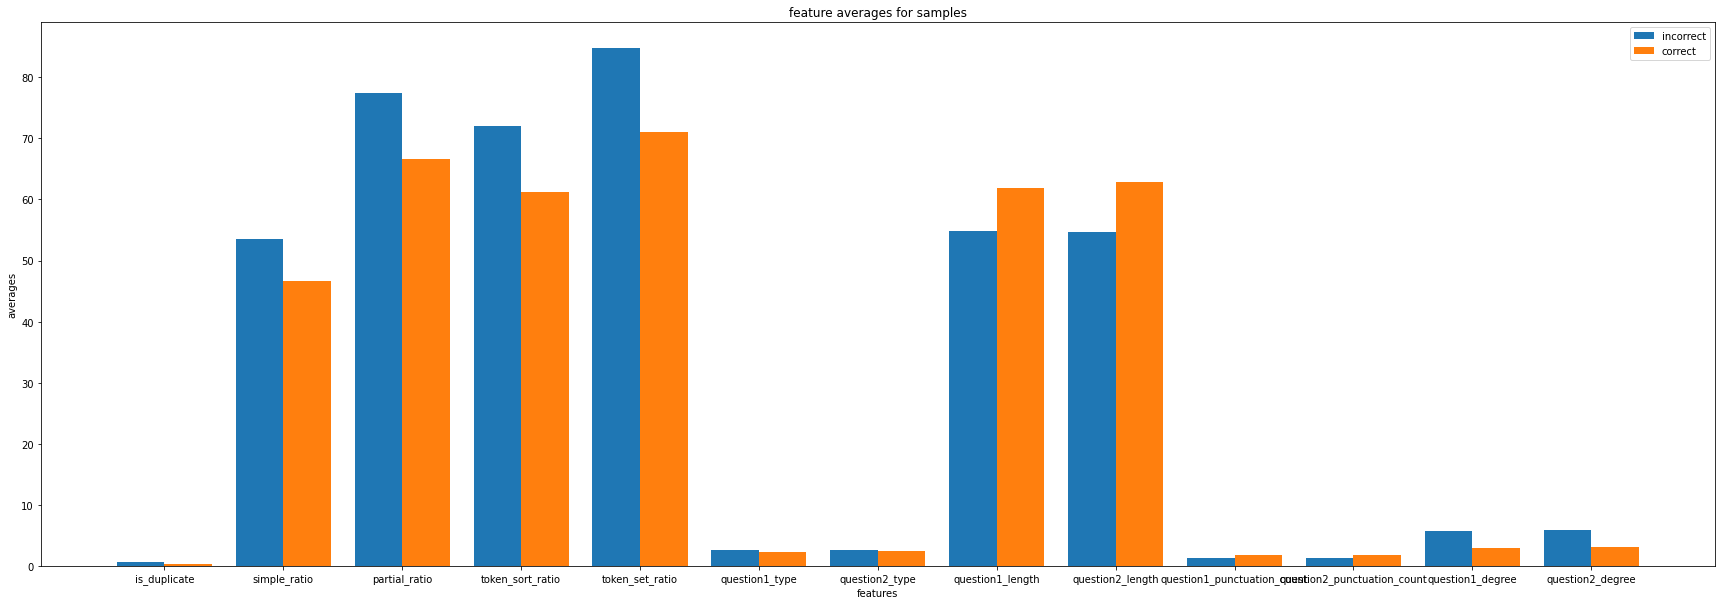

In [27]:
incorrect_data = {}
correct_data = {}

for col_type, column in zip(incorrect_df.dtypes, incorrect_df.columns):
    if col_type == 'int64' and column not in ['qid1', 'id', 'qid2']:
        incorrect_data[column] = incorrect_df[column].mean()
        correct_data[column] = correct_df[column].mean()

features = list(incorrect_data.keys())
incorrect_values = list(incorrect_data.values())
correct_values = list(correct_data.values())
  
fig = plt.figure(figsize = (30, 10))
 
X_axis = np.arange(len(features))
 
plt.bar(X_axis - 0.2, incorrect_values, width = 0.4, label='incorrect')
plt.bar(X_axis+0.2, correct_values, width = 0.4, label='correct')
 
plt.xticks(X_axis, features)
plt.xlabel("features")
plt.ylabel("averages")
plt.title("feature averages for samples")
plt.legend()
plt.show()